In [1]:
#导入库
import pandas as pd
import numpy as np

In [2]:
#数据读取
train_df = pd.read_csv('train.csv',index_col=0)
test_df = pd.read_csv('test.csv',index_col=0)

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


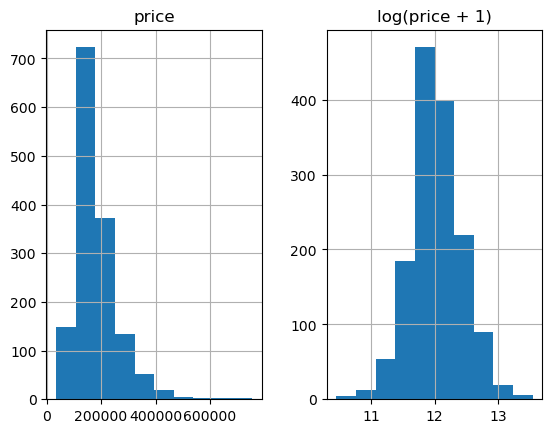

In [3]:
#绘制房价分布的直方图
import matplotlib.pyplot as plt
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"],"log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()
plt.show()

In [4]:
#将训练集房价列取对数加1并且暂时移除这一列
y_train = np.log1p(train_df.pop('SalePrice'))

In [5]:
#合并训练集和测试集
all_df = pd.concat((train_df, test_df), axis=0)

In [6]:
all_df.shape

(2919, 79)

In [7]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [8]:
#对数据进行独热编码处理将类别型变量转换为数值型
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [9]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF1        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
GarageCars        1
dtype: int64

In [11]:
#计算平均值，用平均值填充缺失值
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

MSSubClass         57.137718
LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
dtype: float64

In [12]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [13]:
all_dummy_df.isnull().sum().sum()

0

In [14]:
#筛选出数值型的列
numeric_cols = all_df.columns[all_df.dtypes !='object']
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [16]:
#对数值型的列进行标准化处理
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [17]:
#分离训练集和测试集
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [18]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 287), (1459, 287))

In [19]:
#导入Ridge类和cross_val_score函数
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [20]:
#将训练集和测试集转换为数组
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [21]:
#定义不同的α值，用于岭回归的参数调优
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

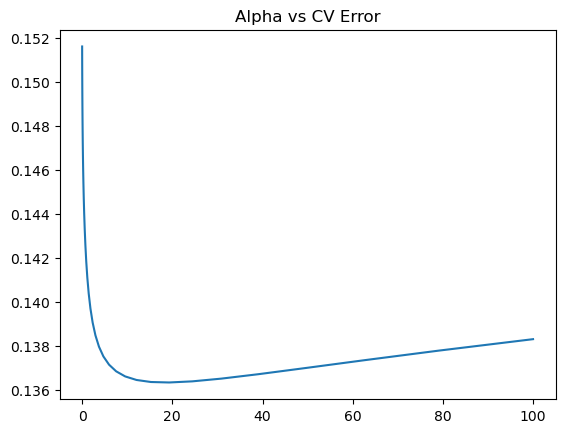

In [22]:
#绘制α值与交叉验证误差的关系图
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error")
plt.show()

In [24]:
#导入RandomForestRegressor类
from sklearn.ensemble import RandomForestRegressor

In [25]:
#定义不同的最大特征数用于随机森林的参数调优，进行5折交叉验证计算均方根误差
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

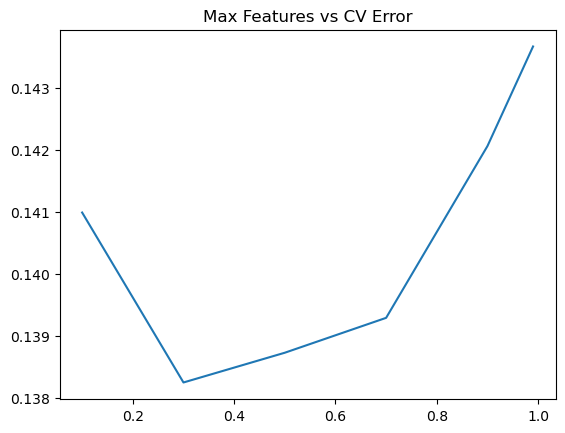

In [26]:
#绘制最大特指数和交叉验证误差的关系图
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error")
plt.show()

In [27]:
#使用调优后的超参数
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=500, max_features=0.3)

In [28]:
#训练岭回归和随机森林回归模型
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.3, n_estimators=500)

In [29]:
#将数据转换回原始尺度
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))

In [30]:
#用均值融合两个模型的预测结果
y_final = (y_ridge + y_rf) / 2

In [31]:
submission_df = pd.DataFrame(data = {'Id': test_df.index, 'SalePrice': y_final})

In [32]:
submission_df.head(10)

,Id,SalePrice
0,1461,119186.463916
1,1462,151344.943118
2,1463,173908.236831
3,1464,190175.436532
4,1465,194295.953049
5,1466,176228.426266
6,1467,176566.899692
7,1468,169215.344123
8,1469,184585.262877
9,1470,122290.748738


In [33]:
submission_df.to_csv('submission.csv',index=False)

In [34]:
#交叉验证误差的比较
cv = 5
ridge_scores = np.sqrt(-cross_val_score(ridge, X_train, y_train, cv=cv, scoring='neg_mean_squared_error'))
rf_scores = np.sqrt(-cross_val_score(rf, X_train, y_train, cv=cv, scoring='neg_mean_squared_error'))
combined_scores = (ridge_scores + rf_scores) / 2

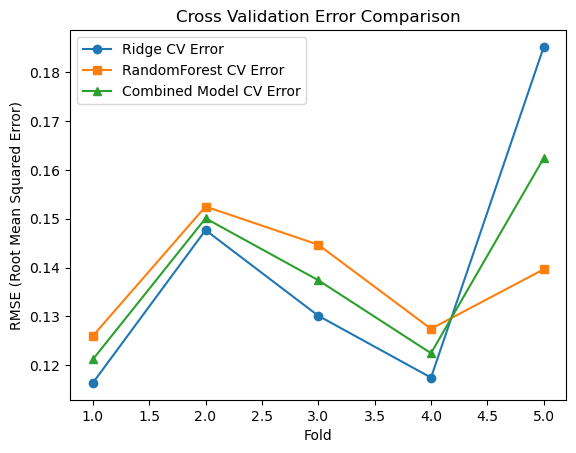

In [35]:
# 绘制交叉验证误差图片
plt.plot(range(1, cv + 1), ridge_scores, label='Ridge CV Error', marker='o')
plt.plot(range(1, cv + 1), rf_scores, label='RandomForest CV Error', marker='s')
plt.plot(range(1, cv + 1), combined_scores, label='Combined Model CV Error', marker='^')

plt.xlabel('Fold')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.title('Cross Validation Error Comparison')
plt.legend()
plt.show()

In [39]:
#获取两种模型特征重要性
rf_feature_importance = rf.feature_importances_
ridge_feature_importance = np.abs(ridge.coef_)

In [40]:
# 创建一个DataFrame，包含特征名称和两种模型的特征重要性
feature_importance_df = pd.DataFrame({
    'feature': dummy_train_df.columns,
    'RandomForest Importance': rf_feature_importance,
    'Ridge Importance': ridge_feature_importance
})

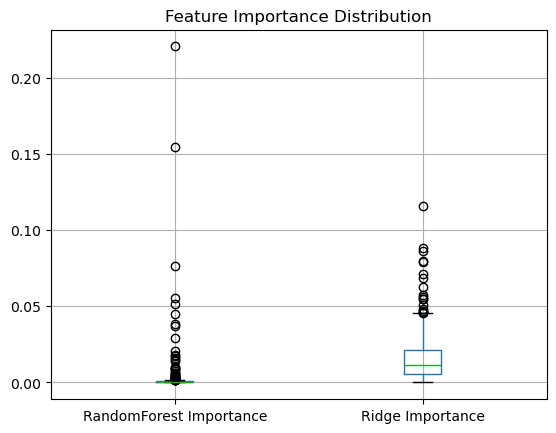

In [41]:
# 绘制箱线图展示特征重要性分布
feature_importance_df[['RandomForest Importance', 'Ridge Importance']].boxplot()
plt.title('Feature Importance Distribution')
plt.show()